In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt


In [2]:
img=cv2.imread("C:\\Users\\vishn\\DataScience\\Projects For Ds\\imageClass\\model\\test_img\\dulquer.jpg")

In [3]:
img.shape

(600, 800, 3)

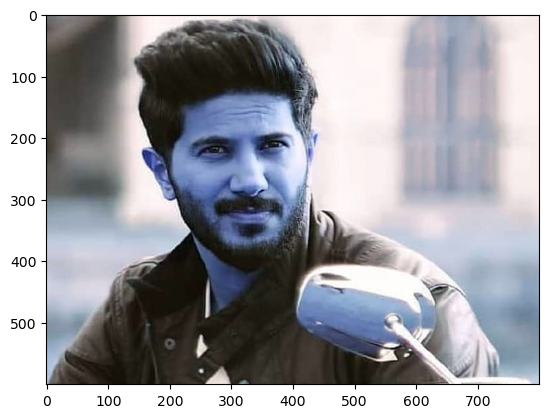

In [4]:
plt.imshow(img)

In [5]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray

array([[116, 117, 118, ..., 238, 238, 238],
       [116, 116, 117, ..., 238, 238, 238],
       [114, 114, 115, ..., 238, 238, 238],
       ...,
       [195, 196, 192, ..., 212, 212, 212],
       [197, 197, 190, ..., 212, 212, 212],
       [200, 198, 189, ..., 212, 212, 212]], dtype=uint8)

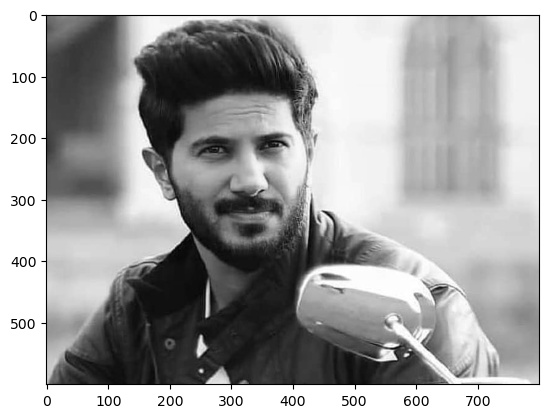

In [6]:
plt.imshow(gray,cmap='gray')

In [7]:
#we are catchin the opencv haarcascade xml that help us to find the correct location of the image like face or eye or etc

face_cascade = cv2.CascadeClassifier('C:\\Users\\vishn\\Downloads\\opencv-master\\opencv-master\\data\\haarcascades\\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:\\Users\\vishn\\Downloads\\opencv-master\\opencv-master\\data\\haarcascades\\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[177, 112, 279, 279]])

In [8]:
(x,y,w,h)=faces[0]
x,y,w,h

(177, 112, 279, 279)

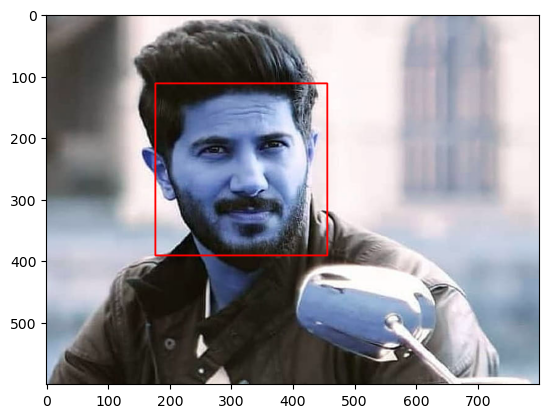

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

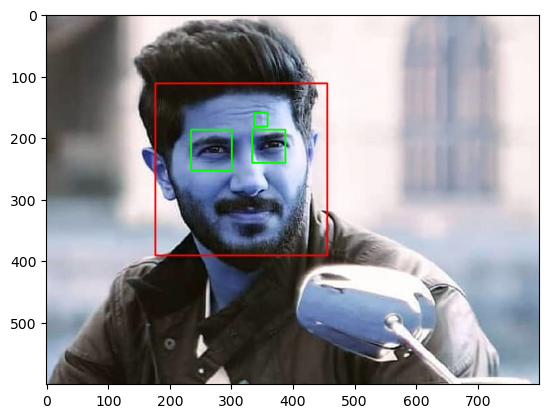

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

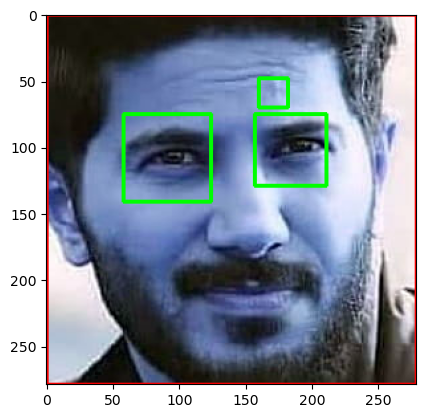

In [11]:
plt.imshow(roi_color,cmap='gray')

In [12]:
#im going to create a function that helps us to get a croped img, only its works when there is clearly two eyes shown
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color#only its works when there is clearly two eyes shown

In [13]:
cropped_img=get_cropped_image_if_2_eyes('C:\\Users\\vishn\\DataScience\\Projects For Ds\\imageClass\\model\\test_img\\dulquer.jpg')

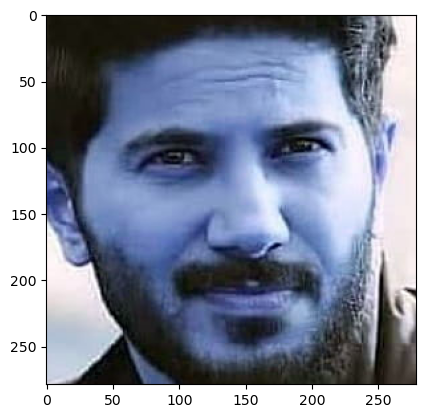

In [14]:
plt.imshow(cropped_img)

In [15]:
path_to_data="C:\\Users\\vishn\\DataScience\\Projects For Ds\\imageClass\\model\\datasets" #the file for catching the images
path_to_cr_data="C:\\Users\\vishn\\DataScience\\Projects For Ds\\imageClass\\model\\datasets\\cropped"#the file for adding the cropped imgs

In [16]:
#collecting the paths of all the img files liek dq jackie etc etc
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [17]:
img_dirs

['C:\\Users\\vishn\\DataScience\\Projects For Ds\\imageClass\\model\\datasets\\dq',
 'C:\\Users\\vishn\\DataScience\\Projects For Ds\\imageClass\\model\\datasets\\jackie',
 'C:\\Users\\vishn\\DataScience\\Projects For Ds\\imageClass\\model\\datasets\\mohanlal']

In [18]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)#it will create a file called cropped
os.mkdir(path_to_cr_data)

In [19]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)
        
        

dq
jackie
mohanlal


In [20]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir                   
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:                   
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1   

dq
Generating cropped images in folder:  C:\Users\vishn\DataScience\Projects For Ds\imageClass\model\datasets\croppeddq
jackie
Generating cropped images in folder:  C:\Users\vishn\DataScience\Projects For Ds\imageClass\model\datasets\croppedjackie
mohanlal
Generating cropped images in folder:  C:\Users\vishn\DataScience\Projects For Ds\imageClass\model\datasets\croppedmohanlal


# wavelet transformator
it will catch the orginal img and convert it in to wavelet img

In [ ]:
import pywt
im_har=w2d(cropped_img,'db1',5)
plt.imshow(im_har,cmap='gray')

In [21]:
import numpy as np
import pywt #wavelet transs
import cv2    
#it will catch the orginal img and convert it in to wavelet img
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

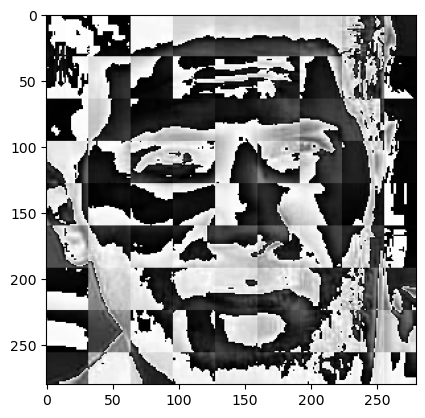

In [50]:
import pywt
im_har=w2d(cropped_img,'db1',5)
plt.imshow(im_har,cmap='gray')


In [22]:
celebrity_file_names_dict

{'dq': ['C:\\Users\\vishn\\DataScience\\Projects For Ds\\imageClass\\model\\datasets\\croppeddq/dq1.png',
  'C:\\Users\\vishn\\DataScience\\Projects For Ds\\imageClass\\model\\datasets\\croppeddq/dq2.png',
  'C:\\Users\\vishn\\DataScience\\Projects For Ds\\imageClass\\model\\datasets\\croppeddq/dq3.png',
  'C:\\Users\\vishn\\DataScience\\Projects For Ds\\imageClass\\model\\datasets\\croppeddq/dq4.png',
  'C:\\Users\\vishn\\DataScience\\Projects For Ds\\imageClass\\model\\datasets\\croppeddq/dq5.png',
  'C:\\Users\\vishn\\DataScience\\Projects For Ds\\imageClass\\model\\datasets\\croppeddq/dq6.png',
  'C:\\Users\\vishn\\DataScience\\Projects For Ds\\imageClass\\model\\datasets\\croppeddq/dq7.png',
  'C:\\Users\\vishn\\DataScience\\Projects For Ds\\imageClass\\model\\datasets\\croppeddq/dq8.png',
  'C:\\Users\\vishn\\DataScience\\Projects For Ds\\imageClass\\model\\datasets\\croppeddq/dq9.png',
  'C:\\Users\\vishn\\DataScience\\Projects For Ds\\imageClass\\model\\datasets\\croppeddq/dq10

In [23]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict #we need to train this data as y 

{'dq': 0, 'jackie': 1, 'mohanlal': 2}

In [25]:
X=[]
y=[]

for celebrity_name , training_files in celebrity_file_names_dict.items():
    for training_iamge in training_files:
        img=cv2.imread(training_iamge)
        scalled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])
        

In [26]:
X

[array([[  9],
        [  9],
        [  9],
        ...,
        [  2],
        [ 10],
        [252]], dtype=uint8),
 array([[ 11],
        [ 10],
        [ 12],
        ...,
        [237],
        [  4],
        [  0]], dtype=uint8),
 array([[ 53],
        [ 22],
        [ 19],
        ...,
        [ 39],
        [221],
        [ 10]], dtype=uint8),
 array([[ 69],
        [ 66],
        [ 68],
        ...,
        [188],
        [195],
        [210]], dtype=uint8),
 array([[ 38],
        [ 19],
        [ 38],
        ...,
        [ 13],
        [131],
        [  9]], dtype=uint8),
 array([[ 17],
        [ 13],
        [  8],
        ...,
        [251],
        [255],
        [  4]], dtype=uint8),
 array([[153],
        [166],
        [188],
        ...,
        [201],
        [  7],
        [ 97]], dtype=uint8),
 array([[18],
        [20],
        [14],
        ...,
        [72],
        [ 0],
        [ 0]], dtype=uint8),
 array([[ 11],
        [ 12],
        [ 12],
        ...,
    

In [27]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [29]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(106, 4096)

In [34]:
X_test

array([[ 94.,  97., 105., ..., 251.,   2., 220.],
       [143., 156., 172., ..., 252.,  11.,   2.],
       [144., 140., 122., ...,  23.,  91.,  61.],
       ...,
       [ 33.,  43.,  43., ...,   0.,   2., 249.],
       [ 69.,  66.,  68., ..., 188., 195., 210.],
       [ 99., 164., 142., ..., 226., 236.,  25.]])

# training data
We will use SVM with rbf kernel tuned with heuristic finetuning

In [30]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7777777777777778

In [33]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       0.67      0.67      0.67         3
           2       0.76      1.00      0.86        16

    accuracy                           0.78        27
   macro avg       0.81      0.68      0.69        27
weighted avg       0.82      0.78      0.75        27



# feature  engineering
Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [35]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV #to find the the best parameter based on the accuracy

In [36]:
#creating a dic for try all the model
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [38]:
#this loop will find the best model 
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.760000,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.709167,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.745833,{'logisticregression__C': 1}


In [39]:
best_estimators['svm'].score(X_test,y_test)#this the best model by accuracy

0.8518518518518519

In [40]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8148148148148148

In [43]:
best_clf=best_estimators['svm']

In [46]:
class_dict

{'dq': 0, 'jackie': 1, 'mohanlal': 2}

# confusion_matrix

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 5,  1,  2],
       [ 0,  3,  0],
       [ 1,  0, 15]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

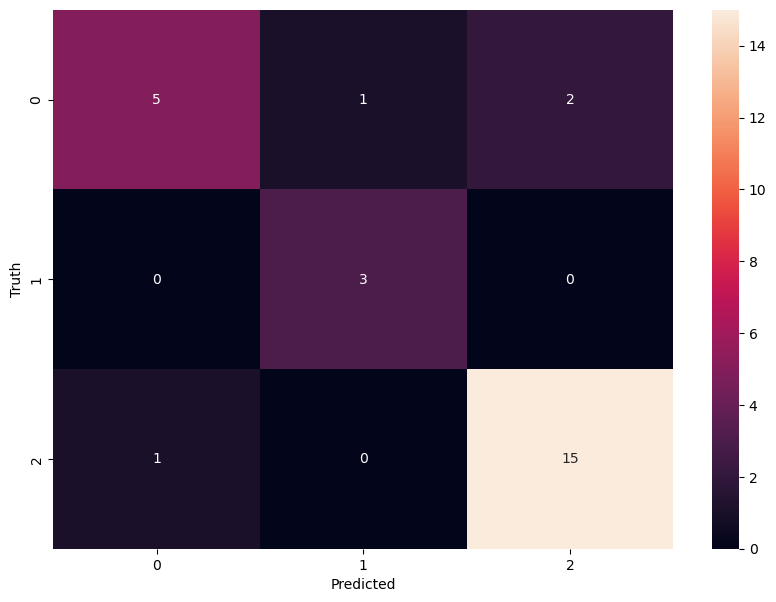

In [45]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# save the trained model

In [47]:
! pip install joblib

In [48]:
import joblib
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

# save the class dictionary we need this later

In [49]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))